In [1]:
#import packages and libry
import numpy as np
import pandas as pd

In [2]:
#import datasets
dataset = pd.read_csv("SMSSpamCollection", sep='\t', names=['label','message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#change label new value
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})


In [7]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

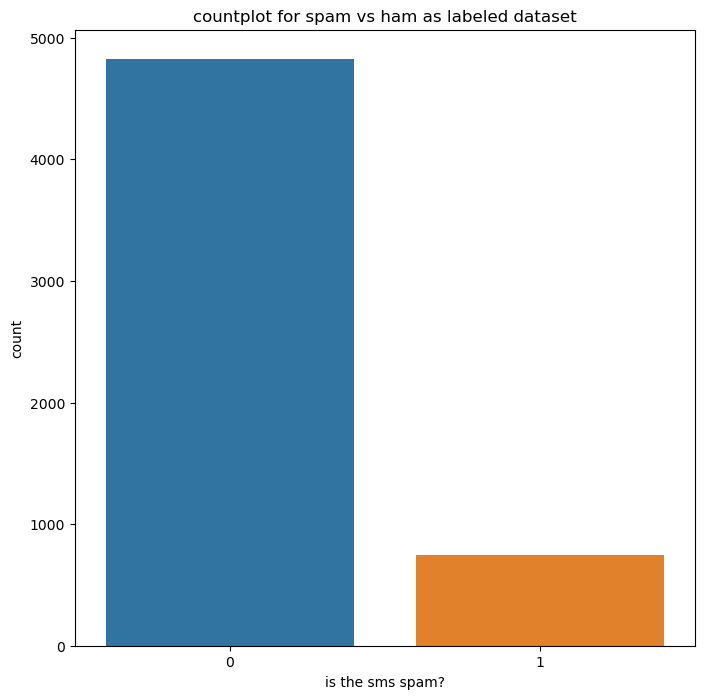

In [9]:
#chek countplot for sam vs ham dataset as imbalenced data set
plt.figure(figsize=(8,8))
b = sns.countplot(x="label", data=dataset)
p = plt.title('countplot for spam vs ham as labeled dataset')
p = plt.xlabel('is the sms spam?')


In [10]:
#handling dataet dute to imbalance dataset using over sampling
only_spam = dataset[dataset["label"] == 1]

In [11]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
print("no of spam sms=",len(only_spam))
print("no of ham sms=",len(dataset) - len(only_spam))


no of spam sms= 747
no of ham sms= 4825


In [13]:
#how many time we should replicate a spam to get ham near value
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [14]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])
    
dataset.shape

(9307, 2)

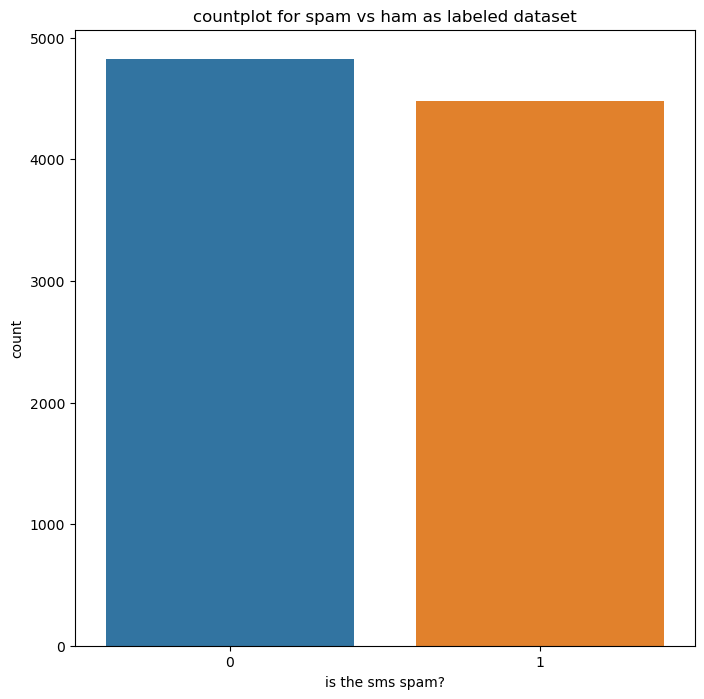

In [15]:
#chek countplot for sam vs ham dataset as balenced data set
plt.figure(figsize=(8,8))
b = sns.countplot(x="label", data=dataset)
p = plt.title('countplot for spam vs ham as labeled dataset')
p = plt.xlabel('is the sms spam?')


In [16]:
#creating new feature  lije word count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [17]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


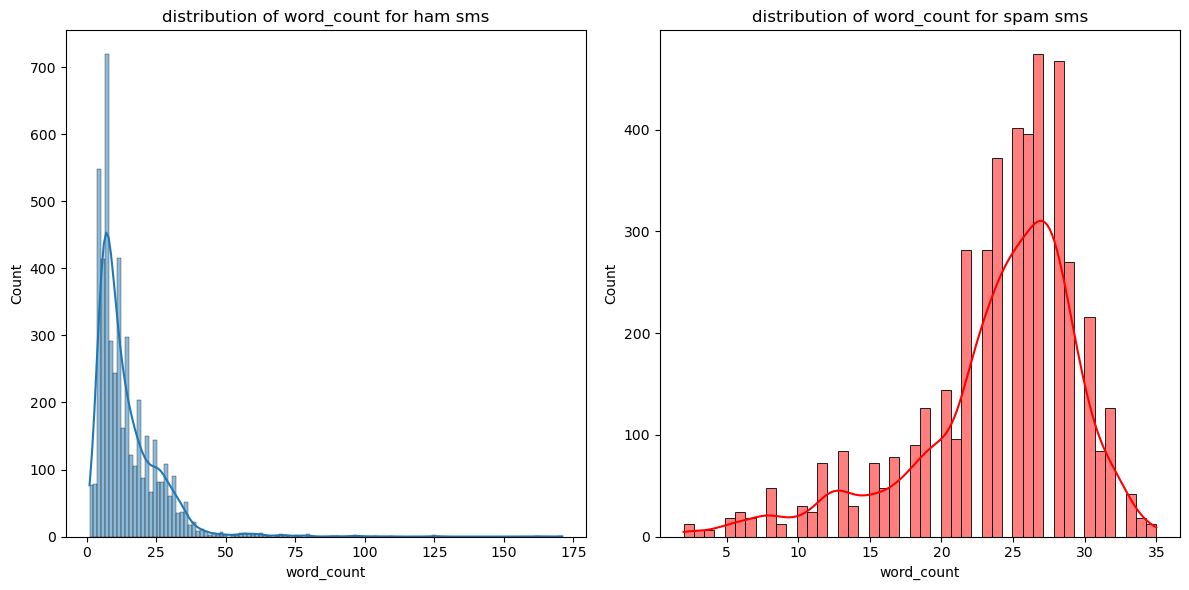

In [18]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True)
p = plt.title("distribution of word_count for ham sms")

# _(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color= "red", kde=True)
p = plt.title("distribution of word_count for spam sms")

plt.tight_layout()
plt.show()

In [19]:
#create new symbol as currency
def currency(data):
    currency = ['$', '€', '£', ' ¥', '₹', '₽']
    for i in currency:
        if i in data:
            return 1
    return 0

In [20]:
dataset["currency"] = dataset["message"].apply(currency)

In [21]:
dataset

,label,message,word_count,currency
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


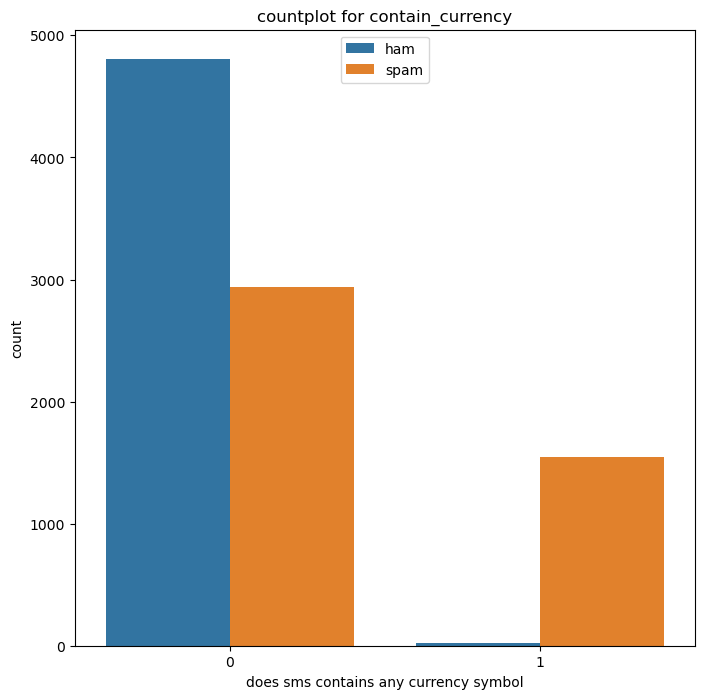

In [22]:
#creating count plot for currency
plt.figure(figsize=(8,8))
g = sns.countplot(x= 'currency',data=dataset,hue = "label" )
p = plt.title("countplot for contain_currency")
p = plt.xlabel('does sms contains any currency symbol')
p = plt.ylabel('count')
p = plt.legend(labels=['ham','spam'],loc=9)

In [23]:
#creating new feature of containg numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0


In [24]:
dataset["contain_no"] = dataset["message"].apply(number)

In [25]:
dataset

,label,message,word_count,currency,contain_no
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


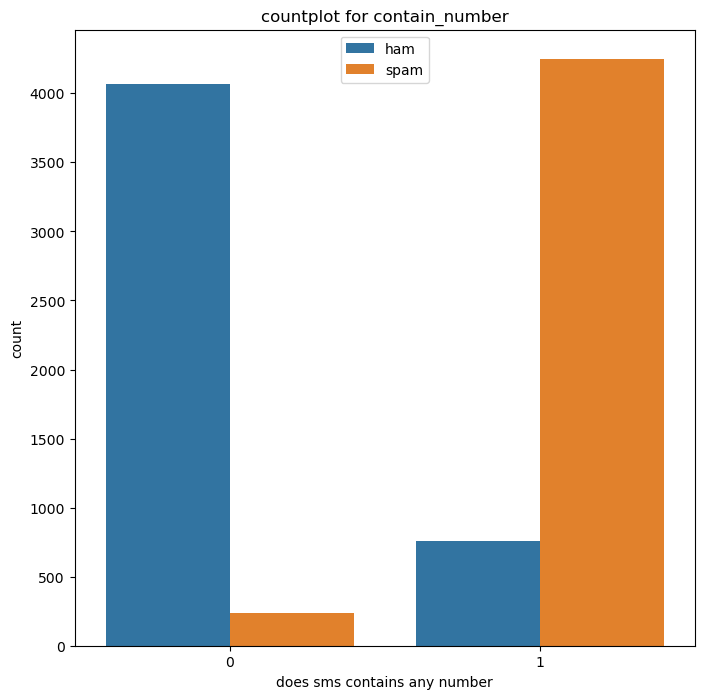

In [26]:
#count plot forr containing numbers
plt.figure(figsize=(8,8))
g = sns.countplot(x= 'contain_no',data=dataset,hue = "label" )
p = plt.title("countplot for contain_number")
p = plt.xlabel('does sms contains any number')
p = plt.ylabel('count')
p = plt.legend(labels=['ham','spam'],loc=9)

In [27]:
#data cleaning 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\basav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
'''corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]',repl='',string=sms) #filtering out special character and number
    message = message.lower()
    words = message.split() #tokenn=izer
    filtered_word = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_word = [wnl.lemmatize(word) for word in filtered_word]
    message = ' '.join(lemm_word)
    
    corpus.append(message)'''
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
wnl = WordNetLemmatizer()

# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize an empty list to hold the processed messages
corpus = []

# Iterate over each message in the dataset
for sms in list(dataset.message):
    # Remove special characters and numbers, and convert to lowercase
    message = re.sub(pattern='[^a-zA-Z ]', repl=' ', string=sms).lower()
    
    # Split the message into words
    words = message.split()
    
    # Filter out stopwords and lemmatize the remaining words
    filtered_words = [wnl.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the processed words back into a single string
    message = ' '.join(filtered_words)
    
    # Append the processed message to the corpus
    corpus.append(message)


In [29]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [30]:
#creating the bag of words module
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [31]:
x = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [32]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [34]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [35]:
#naive base model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
# Assuming 'cv' is the array of cross-validation scores:
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


0.943
0.004


In [36]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

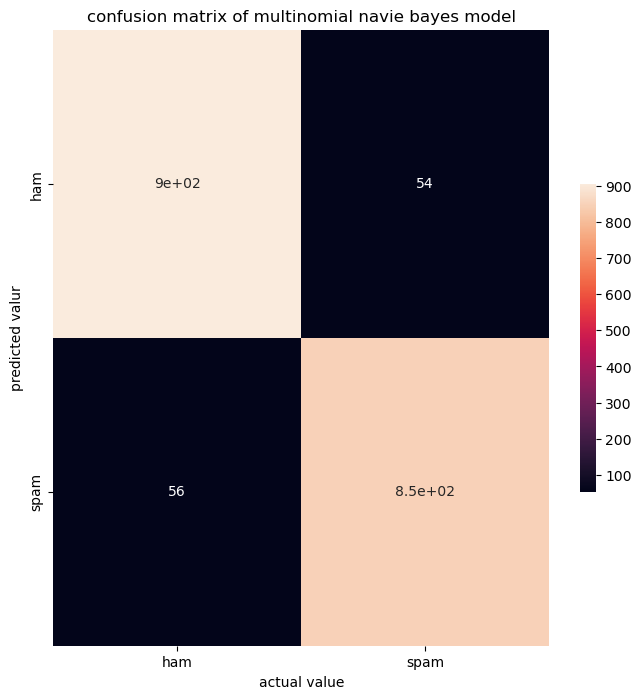

In [39]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.5})
p = plt.title('confusion matrix of multinomial navie bayes model')
p = plt.xlabel('actual value')
p = plt.ylabel('predicted valur')


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring='f1', cv=10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))


0.981
0.003


In [41]:
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [43]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[927,  32],
       [  4, 899]], dtype=int64)

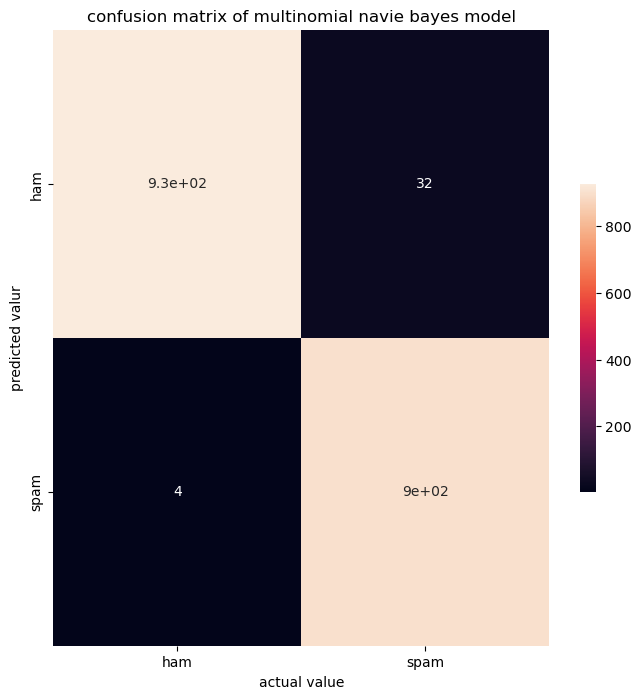

In [44]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm1, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.5})
p = plt.title('confusion matrix of multinomial navie bayes model')
p = plt.xlabel('actual value')
p = plt.ylabel('predicted valur')

In [45]:
def predict_spam(sms):
    for sms in list(dataset.message):
        message = re.sub(pattern='[^a-zA-Z ]', repl=' ', string=sms).lower()
        words = message.split()
        filtered_words = [wnl.lemmatize(word) for word in words if word not in stop_words]
        message = ' '.join(filtered_words)


    temp = tfidf.transform([message]).toarray() 
    return mnb.predict(temp)

In [46]:
#predition 1
sample_message = 'IMPORTANT -you could be entiteld up to 11,1000 in compensation from nis-sold ppi on a crediy'

if predict_spam(sample_message):
    print('this is a spam message')
else:
    print('this is aham message')

this is a spam message


C:\Users\basav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [47]:
sample_message = 'come to think of it, i i have never hgot a spam message before'

if predict_spam(sample_message):
    print('this is a spam message')
else:
    print('this is aham message')

this is a spam message


C:\Users\basav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
